# Geometrical Methods in Machine Learning
## Seminar 4: Kernel PCA

In [1]:
from __future__ import print_function

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from sklearn.datasets import load_digits, fetch_olivetti_faces, make_moons, make_circles
from sklearn.datasets.samples_generator import make_swiss_roll
from sklearn.metrics.pairwise import linear_kernel, rbf_kernel, sigmoid_kernel, cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

## 1. Moons

In [2]:
# load data
X, y = make_moons(n_samples=500, noise=0.01, random_state=42)
X_std = StandardScaler().fit_transform(X)

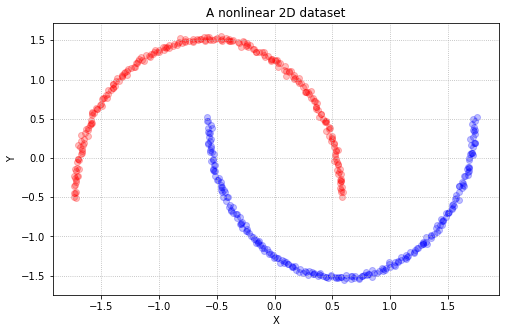

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(X_std[y==0, 0], X_std[y==0, 1], color='red', alpha=0.25)
plt.scatter(X_std[y==1, 0], X_std[y==1, 1], color='blue', alpha=0.25)
plt.title('A nonlinear 2D dataset')
plt.ylabel('Y')
plt.xlabel('X')
plt.grid(linestyle="dotted")
plt.show()

In [4]:
# apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_1d = PCA(n_components=1)
X_pca_1d = pca_1d.fit_transform(X)

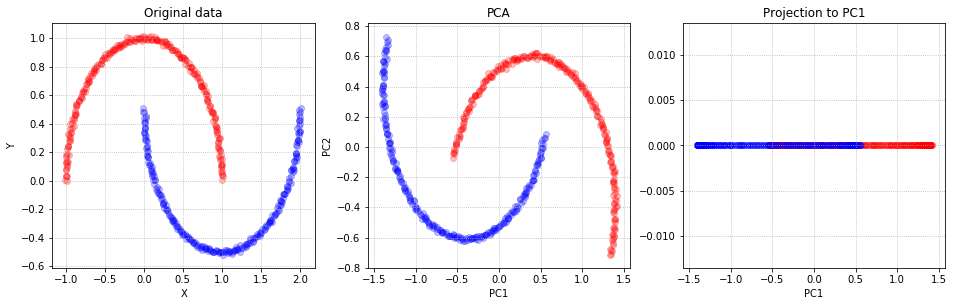

In [5]:
plt.figure(figsize=(16,4.5))

plt.subplot(131)
plt.title('Original data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(linestyle="dotted")
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.25)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.25)

plt.subplot(132)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(linestyle="dotted")
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', alpha=0.25)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', alpha=0.25)

plt.subplot(133)
plt.title('Projection to PC1')
plt.xlabel('PC1')
plt.grid(linestyle="dotted")
plt.scatter(X_pca_1d[y==0, 0], np.zeros((int(X_pca.shape[0]/2),1)), color='red', alpha=0.25)
plt.scatter(X_pca_1d[y==1, 0], np.zeros((int(X_pca.shape[0]/2),1)), color='blue', alpha=0.25)

plt.show()

## 1. Kernels

Kernel is any symmetric positive-definite function of the form:

$$K(\mathbf{x}, \mathbf{x}') = \langle \phi(\mathbf{x}), \phi(\mathbf{x}') \rangle$$

where $\phi$ is a function that projects vectors $\mathbf{x}$ and $\mathbf{x}'$ into a new vector space. The kernel function can be seen as a function that computes the inner-product between two vectors in some, potentially infinite-dimensinal space.

### 1.1. Linear kernel

A _linear kernel_ is given by $\mathbf{x}^T\mathbf{x}$, thus the inner product in the original vector space. Consider a $n \times m$ dataset $\mathbf{X} = \{ \mathbf{x}_1, \dots, \mathbf{x}_n\}$ with $n$ observations and $m$ features, then _Gram matrix_ $\mathbf{G} = \mathbf{X} \mathbf{X}^T$ is a matrix of inner-products, in this notation covariance matrix $\mathbf{S}$ is given by $\mathbf{X}^T\mathbf{X}$.

#### Exercise

Compute the matrix of pairwise linear kernels for a moons dataset $\mathbf{X}$, check that it is Gram matrix. You can use `linear_kernel` from `sklearn.metrics.pairwise`.

In [8]:
K = linear_kernel(X)
G = np.dot(X, X.T)

K - G

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

KernelPCA with linear kernel obviously is equivalent to PCA.

In [9]:
# apply KernelPCA with linear kernel
kpca = KernelPCA(n_components=2)
X_kpca = kpca.fit_transform(X)

kpca_1d = KernelPCA(n_components=1)
X_kpca_1d = kpca_1d.fit_transform(X)

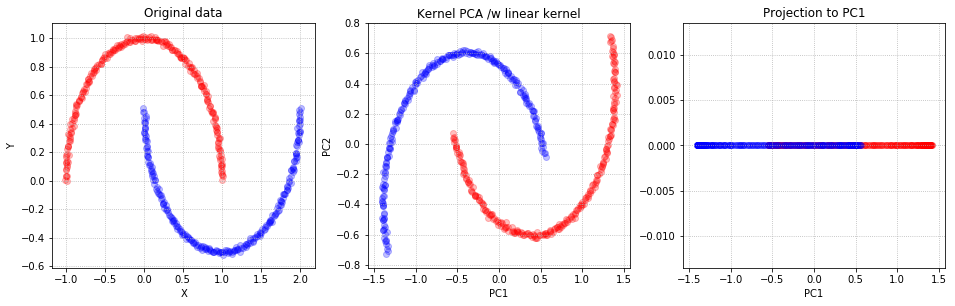

In [10]:
plt.figure(figsize=(16,4.5))

plt.subplot(131)
plt.title('Original data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(linestyle="dotted")
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.25)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.25)

plt.subplot(132)
plt.title('Kernel PCA /w linear kernel')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(linestyle="dotted")
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.25)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.25)

plt.subplot(133)
plt.title('Projection to PC1')
plt.xlabel('PC1')
plt.grid(linestyle="dotted")
plt.scatter(X_pca_1d[y==0, 0], np.zeros((int(X_pca.shape[0]/2),1)), color='red', alpha=0.25)
plt.scatter(X_pca_1d[y==1, 0], np.zeros((int(X_pca.shape[0]/2),1)), color='blue', alpha=0.25)

plt.show()

### 1.2. Gaussian kernel

A radial basis function (RBF) is a real-valued function whose value depends only on the distance $d_X$ from some other point $x'$, so that $\phi (\mathbf {x} ,\mathbf {x'} )= \phi (\|\mathbf {x} -\mathbf {x'} \|)$.

Many distances $d_X$ induce radial basis kernels which given by:

$$K(\mathbf{x}, \mathbf{x}') = \exp \left(- \gamma \| \mathbf{x} -\mathbf{x}' \|^2\right)$$

 If $\gamma = \frac{1}{2 \sigma^2}$ it is known as the Gaussian kernel:

$$K(\mathbf{x}, \mathbf{x}') = \exp \left(- \frac{\| \mathbf{x} -\mathbf{x}' \|^2 }{2 \sigma^2}\right)$$

#### Exercise

Compute the matrix of pairwise RBF kernels for a dataset $\mathbf{X}$. Implement Gaussian kernel, check whether it values are equals scikit-learn solution. Check kernel values for different $\gamma$ and $\sigma$. You can use `rbf_kernel` from `sklearn.metrics.pairwise`.

In [12]:
# compute K for X, matrix of paiwise RBF kernels for dataset X
K = rbf_kernel(X)
K

array([[1.        , 0.43243528, 0.98563725, ..., 0.9836186 , 0.67854636,
        0.29489462],
       [0.43243528, 1.        , 0.40097921, ..., 0.46957508, 0.33630128,
        0.92394555],
       [0.98563725, 0.40097921, 1.        , ..., 0.94031587, 0.76771584,
        0.25660434],
       ...,
       [0.9836186 , 0.46957508, 0.94031587, ..., 1.        , 0.58247168,
        0.34374786],
       [0.67854636, 0.33630128, 0.76771584, ..., 0.58247168, 1.        ,
        0.17750956],
       [0.29489462, 0.92394555, 0.25660434, ..., 0.34374786, 0.17750956,
        1.        ]])

In [13]:
# implement Gaussian kernel
def gaussian_kernel(x, x_prime, sigma=1):
    return np.exp(- (np.linalg.norm(x - x_prime) ** 2) / 2 * sigma**2 )

In [14]:
gaussian_kernel(X[0], X[2])

0.9856372451788605

#### Exercise

Apply KernelPCA with Gaussian kernel with different values of $\gamma$ to Moons dataset.

In [25]:
# apply KernelPCA with Gaussian kernel
gamma = 20

kpca = KernelPCA(n_components=2, kernel="rbf", gamma=gamma)
X_kpca = kpca.fit_transform(X)

kpca_1d = KernelPCA(n_components=1, kernel="rbf", gamma=gamma)
X_kpca_1d = kpca_1d.fit_transform(X)

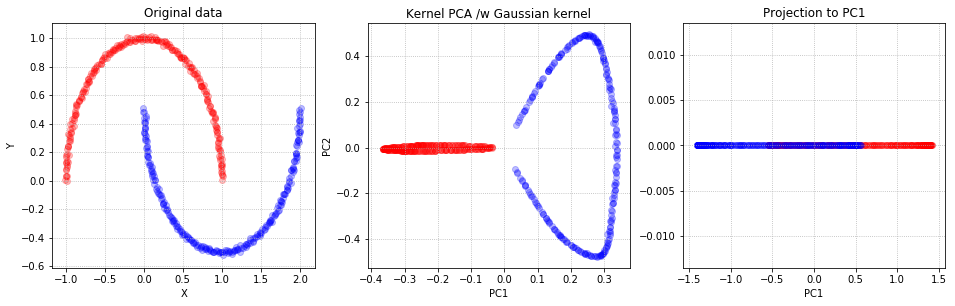

In [26]:
plt.figure(figsize=(16,4.5))

plt.subplot(131)
plt.title('Original data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(linestyle="dotted")
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.25)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.25)

plt.subplot(132)
plt.title('Kernel PCA /w Gaussian kernel')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(linestyle="dotted")
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.25)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.25)

plt.subplot(133)
plt.title('Projection to PC1')
plt.xlabel('PC1')
plt.grid(linestyle="dotted")
plt.scatter(X_pca_1d[y==0, 0], np.zeros((int(X_pca.shape[0]/2),1)), color='red', alpha=0.25)
plt.scatter(X_pca_1d[y==1, 0], np.zeros((int(X_pca.shape[0]/2),1)), color='blue', alpha=0.25)

plt.show()

### 1.3 Polynomial kernel

The polynomial kernel is defined as:

$$K(\mathbf{x}, \mathbf{x'}) = (\gamma \mathbf{x}^\top \mathbf{x}' + c)^d$$

where $\mathbf{x}, \mathbf{x'}$ are the input vectors, $\gamma$, $c$ are scalars and $d$ is the kernel degree.

#### Exercise

Apply KernelPCA with polynomial kernel to Moons dataset.

Check how standartization affects embedding with polynomial kernel.

In [38]:
# standartize the data
X_std = StandardScaler().fit_transform(X)

In [39]:
# apply KernelPCA with Gaussian kernel
degree = 3

kpca = KernelPCA(n_components=2, kernel="poly", degree=degree)
X_kpca = kpca.fit_transform(X_std)

kpca_1d = KernelPCA(n_components=1, kernel="poly", degree=degree)
X_kpca_1d = kpca_1d.fit_transform(X_std)

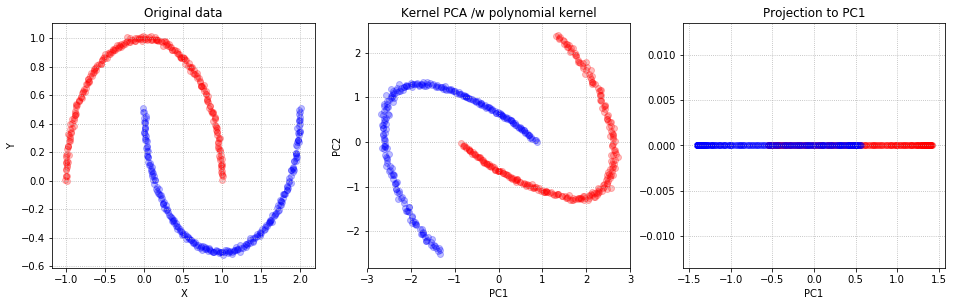

In [40]:
plt.figure(figsize=(16,4.5))

plt.subplot(131)
plt.title('Original data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(linestyle="dotted")
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.25)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.25)

plt.subplot(132)
plt.title('Kernel PCA /w polynomial kernel')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(linestyle="dotted")
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.25)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.25)

plt.subplot(133)
plt.title('Projection to PC1')
plt.xlabel('PC1')
plt.grid(linestyle="dotted")
plt.scatter(X_pca_1d[y==0, 0], np.zeros((int(X_pca.shape[0]/2),1)), color='red', alpha=0.25)
plt.scatter(X_pca_1d[y==1, 0], np.zeros((int(X_pca.shape[0]/2),1)), color='blue', alpha=0.25)

plt.show()

### 1.4. Cosine similarity

Cosine similarity is the normalized dot product between vectors $\mathbf{x}, \mathbf{x}'$ which is the cosine of the angle between the points denoted by the vectors:

$$K(\mathbf{x}, \mathbf{x}') = \frac{\mathbf{x} \mathbf{x}'^\top}{\|\mathbf{x}\| \|\mathbf{x}'\|}$$

#### Exercise

Apply Kernel PCA with cosine similarity `cosine_similarity` as precomputed kernel to Moons dataset.

Check how standartization affects embedding with polynomial kernel.

In [46]:
# standartize the data
X = StandardScaler().fit_transform(X)

In [47]:
# compute K, matrix of paiwise cosine similarities of dataset X
K = cosine_similarity(X)

In [48]:
# apply KernelPCA with cosine similarity as precomputed kernel
kpca = KernelPCA(n_components=2, kernel="precomputed")
X_kpca = kpca.fit_transform(K)

kpca_1d = KernelPCA(n_components=1, kernel="precomputed")
X_kpca_1d = kpca_1d.fit_transform(K)

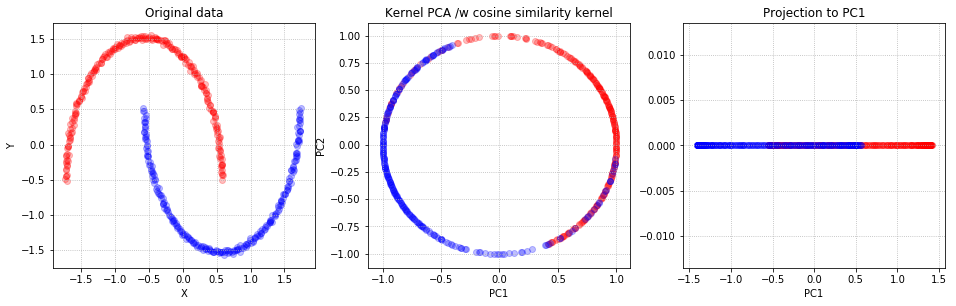

In [49]:
plt.figure(figsize=(16,4.5))

plt.subplot(131)
plt.title('Original data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(linestyle="dotted")
plt.scatter(X_std[y==0, 0], X_std[y==0, 1], color='red', alpha=0.25)
plt.scatter(X_std[y==1, 0], X_std[y==1, 1], color='blue', alpha=0.25)
#plt.scatter(X[y==0, 0], X[y==0, 1], color='green', alpha=0.25)
#plt.scatter(X[y==1, 0], X[y==1, 1], color='orange', alpha=0.25)

plt.subplot(132)
plt.title('Kernel PCA /w cosine similarity kernel')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(linestyle="dotted")
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.25)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.25)

plt.subplot(133)
plt.title('Projection to PC1')
plt.xlabel('PC1')
plt.grid(linestyle="dotted")
plt.scatter(X_pca_1d[y==0, 0], np.zeros((int(X_pca.shape[0]/2),1)), color='red', alpha=0.25)
plt.scatter(X_pca_1d[y==1, 0], np.zeros((int(X_pca.shape[0]/2),1)), color='blue', alpha=0.25)

plt.show()

## 2. Swiss roll

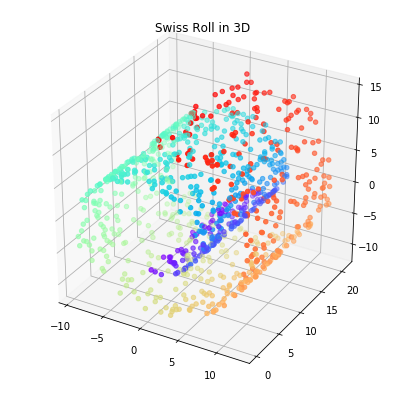

In [50]:
X, color = make_swiss_roll(n_samples=1000, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()

#### Exercise

Apply Kernel PCA with different kernels and kernel parameters to Swiss roll dataset. Compare results.

In [52]:
# standartize the data
X_std = StandardScaler().fit_transform(X)

In [71]:
kpca = KernelPCA(n_components=2, kernel="poly", degree=9)
X_kpca = kpca.fit_transform(X_std)

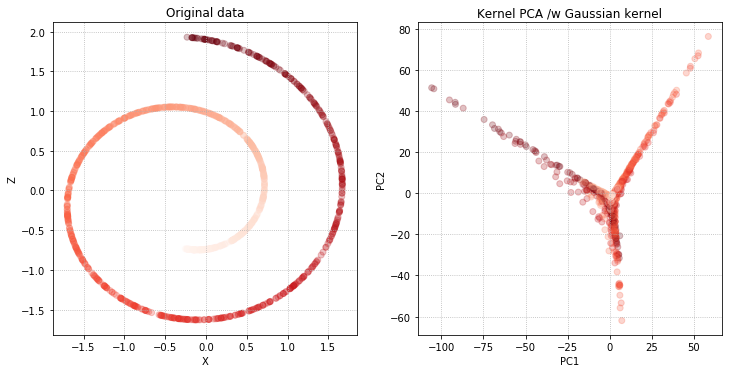

In [72]:
plt.figure(figsize=(12,5.75))

plt.subplot(121)
plt.title('Original data')
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(linestyle="dotted")
plt.scatter(X_std[:, 0], X_std[:, 2], c=color, cmap="Reds", alpha=0.25)

plt.subplot(122)
plt.title('Kernel PCA /w Gaussian kernel')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(linestyle="dotted")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=color, cmap="Reds", alpha=0.25)

plt.show()

**NB:** Kernel PCA with standard kernels fails to unroll swiss roll dataset.